![CDS 411 logo](../../img/cds-411-logo.png)

# Class 20: Monte Carlo simulations III

---

![CC BY-SA 4.0 license](../../img/cc-by-sa.png)

This notebook is licensed under a [Creative Commons Attribution-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-sa/4.0/).

## Load packages

In [1]:
%matplotlib inline

from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib import animation, rc
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from IPython.display import HTML

rc("animation", html="html5")

np.random.seed(686500035)

# Random numbers from various distributions

## Definitions

### Distribution of numbers

A **distribution** of numbers is a description of portion of times each possible outcome or each possible range of outcomes occurs on the average.

### Discrete distribution

A **discrete distribution** is a distribution with discrete values.

### Continuous distribution

A **continuous distribution** is a distribution with continuous values.

### Probability function

*   For a discrete distribution, a **probability function** (or **density function** or **probability density function**) returns the probability of occurrence of a particular argument.

*   For a continuous distribution, a **probability function** (or **density function** or **probability density function**) indicates the probability that a given outcome falls inside a specific range of values.

#### To Generate Random Numbers in Discrete Distribution with Equal Probabilities for Each of *n* Events

Generate a uniform random integer from a sequence of *n* integers, where each integer corresponds to an event.

## Uniform distribution

*   Just as likely to return value in any interval

*   In list of many random numbers, on the average each interval contains same number of generated values

### Using `numpy`

There are two methods available in `numpy` for sampling integers from a uniform distribution.
There is `np.random.randint`, which let's you specify the integer range directly, and works like so:

In [2]:
np.random.randint(low=1, high=5, size=10)

array([4, 3, 1, 1, 2, 4, 1, 1, 3, 1])

And then there's `np.random.choice`, which is more general and allows you to randomly sample from an array-like list.
To replicate the above behavior, you would use the following inputs like so:

In [3]:
np.random.choice(a=[1, 2, 3, 4], size=10, replace=True, p=None)

array([4, 2, 1, 3, 4, 4, 2, 2, 2, 2])

## Non-uniform discrete distributions 

### Manual method
    
*   **To generate random numbers in discrete distribution with probabilities** $p_{1}, p_{2}, \ldots, p_{n}$ **for events** $e_{1}, e_{2}, \ldots, e_{n}$, **respectively, where** $p_{1} + p_{2} + \ldots + p_{n} = 1$

    Generate `rand`, uniform random floating point number in `[0, 1)`  
    If `rand` < $p_{1}$, then return $e_{1}$  
    else if `rand` < $p_{1} + p_{2}$, then return $e_{2}$  
    ...  
    else if `rand` < $p_{1} + p_{2} + \ldots + p_{n} - 1$, then return $e_{n} - 1$  
    else return $e_{n}$
    
As an example, consider the sample distribution `[1, 2, 3, 4]` where value `1` has weight `0.10`, value `2` has weight `0.30`, value `3` has weight `0.40`, and value `4` has weight `0.20`.
Following the approach recipe, this results in the following Python code:

In [4]:
x = None
rand = np.random.uniform()
p = {
    1: 0.10,
    2: 0.30,
    3: 0.40,
    4: 0.20
}

if rand < p[1]:
    x = 1
elif rand < p[1] + p[2]:
    x = 2
elif rand < p[1] + p[2] + p[3]:
    x = 3
else:
    x = 4
    
print(x)

3


### Using `numpy`

A general approach to the discrete distribution again uses `np.random.choice`.
The different weights for different values are specified using the input parameter `p`.
To replicate the prior example, you would use the following inputs:

In [5]:
np.random.choice([1, 2, 3, 4], size=100, p=[0.10, 0.30, 0.40, 0.20])

array([3, 3, 2, 4, 4, 3, 3, 3, 1, 4, 2, 3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 3, 4, 2, 2, 2, 2, 4, 4, 2, 3, 4, 3, 2, 3, 4, 3, 3, 3, 1,
       3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 2, 1, 2, 2, 2, 3, 4, 2, 3, 2, 2, 3,
       4, 4, 1, 4, 3, 2, 3, 2, 3, 3, 3, 4, 2, 4, 3, 3, 2, 1, 1, 4, 3, 4,
       2, 1, 2, 3, 4, 3, 2, 3, 2, 4, 4, 2])

## Continuous distributions

### Normal or Gaussian distribution

Probability density function, where \\(\mu\\) is mean and \\(\sigma\\) is standard deviation:

\begin{equation}
\dfrac{1}{\sqrt{2\pi{}\sigma{}}}e^{-(x-\mu{})^{2}/(2\sigma{})}
\end{equation}

In [6]:
mean_norm = 0
sd_norm = 1
x_norm = np.linspace(-3, 3, 200)
normal_df = pd.DataFrame({
    "x": x_norm,
    "y": (
        (1 / np.sqrt(2 * np.pi * sd_norm)) *
        np.exp(-(x_norm - mean_norm)**2 /(2 * sd_norm))
    )
})

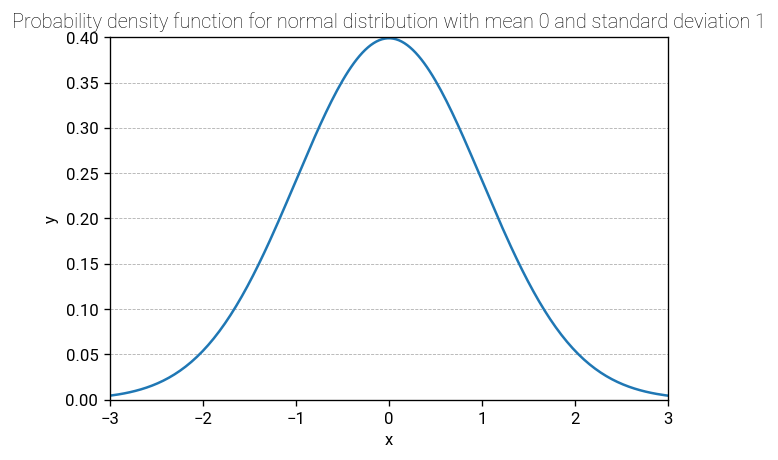

In [7]:
fig, ax = plt.subplots(dpi=120);
sns.lineplot(x="x", y="y", data=normal_df, ax=ax)
ax.set_title("Probability density function for normal distribution with "
             "mean 0 and standard deviation 1")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_xlim([-3, 3])
ax.set_ylim([0, 0.4]);

#### Box-Muller-Gauss Method

*   For normal distribution with mean µ and standard deviation σ

    *   Compute \\(b \sin(a) + \mu\\) and \\(b \cos(a) + \mu\\) where 
        
        a = uniform random number in [0, 2π)  
        rand = uniform random number in [0, 1)  
        b = \\(\sigma \sqrt{- \ln(\texttt{rand})}\\)

Note that this means the *Box-Muller-Gauss method* outputs two random numbers, which is reasonable, since we need to provide two random numbers as inputs.

As an example, let's compute two samples from the standard normal distribution via the *Box-Muller-Gauss method*:

In [8]:
a = 2 * np.pi * np.random.uniform()
b = 1 * np.sqrt(- np.log(np.random.uniform()))
rand1 = b * np.sin(a)
rand2 = b * np.cos(a)
print("random numbers =", tuple((rand1, rand2)))

random numbers = (-0.17825456071289894, 0.4784854000293813)


In [9]:
b * np.sin(a)

-0.17825456071289894

In [10]:
b * np.cos(a)

0.4784854000293813

### How to generate a distribution's random numbers from a probability distribution function

You might be wondering how to derive the *Box-Muller-Gauss method* for sampling from a normal distribution.
Obtaining this formula, along with similar expressions for other functions, follows a standard recipe.
The requirement is that you are starting with a formula for the probability distribution function (PDF).
If you have that, then you can do the following:

<ol>
  <li>
  Assume that we have a continuous $\texttt{PDF}(x)$ function defined for the range $[a, b]$.
  Find the cumulative distribution function (CDF), which maps distribution values to their percentile rank, by integrating the PDF like so:

  $$\texttt{CDF}(x) = \int_{-a}^{x} \texttt{PDF}(x') dx'$$

  where $a \leq x \leq b$.
  </li>
</ol>

<ol>
  <li value="2">
  The outputs of *any* CDF function, regardless of the initial PDF or the range of $x$, are uniformly distributed in the range $[0, 1]$:

  $$0 \leq \texttt{CDF}(x) \leq 1$$
    
  This follows from 10% of the distribution existing below the 10th percentile, 20% of the distribution existing below the 20th percentile, and so on.
  Thus, we can sample the $\texttt{CDF}(x)$ outputs by generating a series of uniform random numbers `rand` between 0 and 1.
  </li>
</ol>

<ol>
  <li value="3">
  Once we have our uniform random number $\texttt{CDF}(x)$, we then need to solve the following expression for $x$:

  $$\texttt{rand} = \texttt{CDF}(x)$$

  This involves inverting the $\texttt{CDF}(x)$ expression, which may or may not have an analytic form.
  If it does, then we will have an expression for $x$ that depends on constants and the random number `rand` only, like so:

  $$x_{\text{random}} = \texttt{CDF}^{-1}(\texttt{rand})$$

  Note that $\texttt{CDF}^{-1}$ indicates the inverse, not the reciprocal.
  This allows us to draw directly from the distribution defined by the $\texttt{PDF}(x)$.
  </li>
</ol>

For example, imagine that we have $\texttt{PDF}(x) = 3 x^{2}$ over the range $[0, 1]$.
We can sample from this distribution by first calculating the CDF:

\begin{equation}
\texttt{CDF}(x)=\int_{0}^{x}3x'^{2}dx'
\end{equation}
\begin{equation}
=x^{3}
\end{equation}

Now, we introduce `rand` and invert the $\texttt{CDF}(x)$ expression:

$$x_{\text{random}} = \left(\texttt{rand}\right)^{1/3}$$

So, to sample from the distribution $\texttt{PDF}(x) = 3 x^{2}$ defined in the range $[0, 1]$, we need to generate a uniform random number between 0 and 1, and then take the cube root.

In [11]:
x_example = np.random.uniform(size=100000)**(1/3)
x_df = pd.DataFrame({"x": x_example})

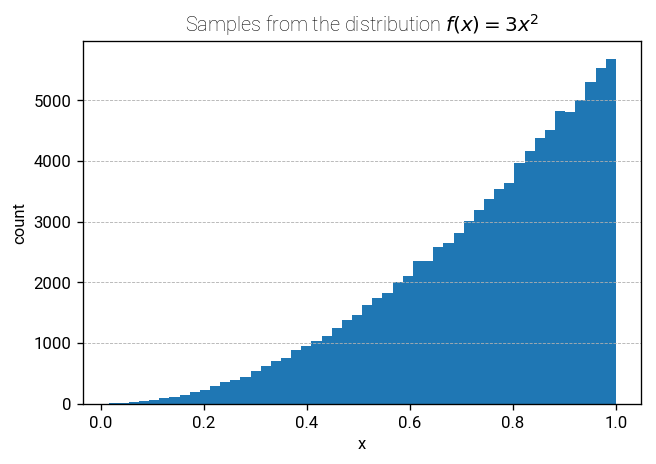

In [12]:
fig, ax = plt.subplots(dpi=120)
sns.distplot(a=x_df["x"], bins=50, kde=False, ax=ax, hist_kws={"alpha": 1})
ax.set_xlabel("x")
ax.set_ylabel("count")
ax.set_title(r"Samples from the distribution $f(x)=3x^2$");

# Random Walk

## Introduction

**Random walk** refers to the apparently random movement of an entity.

*   An entity lives on a cell in a rectangular grid.

*   At each time step, the entity can step onto a neighboring cell

*   The step direction is chosen using a random number generator

*   There can be constraints on how probable each step direction is

## Cellular automata

*   **Ceullular automata** are one style of computer simulation that involves movement on a grid.

*   These are computational models that are discrete in space, state, and time.

*   Structure of a cellular automata simulation

    *   Space is built as a one-, two-, or three-dimensional **grid**.
    
    *   A **site**, or **cell**, of the grid has a state, and the number of states is finite
    
    *   There are **rules**, or **transition rules**, specifying local relationships and indicating how cells are to change state and regulate the behavior of the system

In [13]:
initial_state = np.random.randint(low=0, high=2, size=100)
nine_states = [np.random.choice(a=initial_state, size=(10, 10), replace=False)
               for _ in np.arange(9)]

In [14]:
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    sns.heatmap(data["state"].values[0], **kwargs)

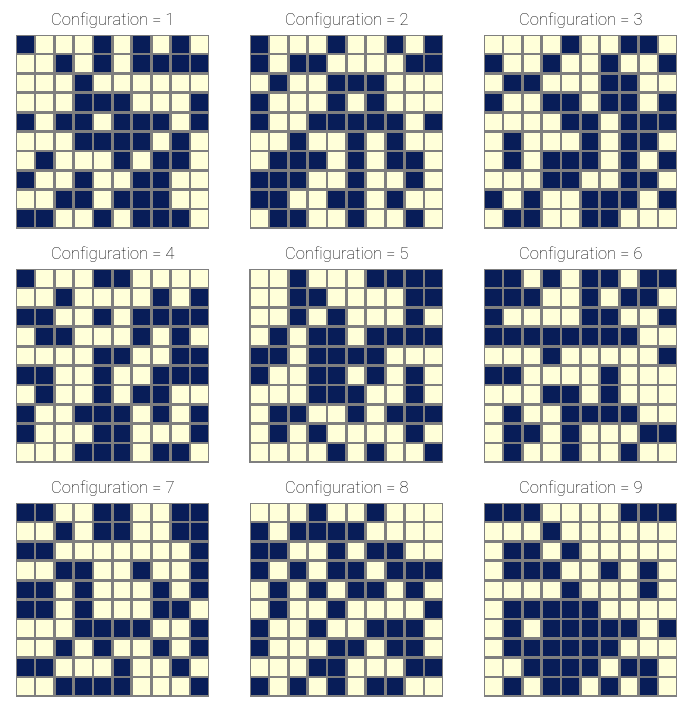

In [15]:
nine_states_df = pd.DataFrame({
    "Configuration": [f"{n}" for n in range(1, 10)],
    "state": nine_states,
})
g = sns.FacetGrid(
    nine_states_df,
    col="Configuration",
    col_wrap=3,
    col_order=[f"{n}" for n in range(1, 10)],
)
g.map_dataframe(draw_heatmap, xticklabels=False, yticklabels=False,
                cmap="YlGnBu", cbar=False, square=True,
                linewidths=1, linecolor='tab:gray')

g.fig.set_dpi(120)
g.fig.set_size_inches(6, 6)
plt.tight_layout();

## Defining the Random Walk

*   We will consider a random walker that can move in one of four directions, NE, NW, SE, SW
*   For each step, we need to generate two random numbers, each of which is either 1 or -1
*   The pair of numbers corresponds to the four directions:
    *   NE step: $(1, 1)$
    *   NW step: $(-1, 1)$
    *   SE step: $(1, -1)$
    *   SW step: $(-1, -1)$

## Algorithm for the Random Walk

1.  Select the number of steps `n` for the simulation
2.  Initialize the walker's position at the origin $(x, y) = (0, 0)$
3.  Initialize a list to store the walker's history, put in the origin as the first entry
4.  Do the following `n` times:

        rand <- a random 0 or 1
        if rand is 0
          increment x by 1
        else
          decrement x by 1
        rand <- a random 0 or 1
        if rand is 0
          increment y by 1
        else
          decrement y by 1
        append point (x, y) onto end of walker's history
    
5.  Return the walker's history at the end of the walk

## Code for Random Walk (based on pseudocode)

First, we implement the Random Walk as specificed in the above pseudocode.
The code is as follows:

Choose the number of steps, initialize walker_x and walker_y, and initialize
the walker history as an array of 3 columns and 101 rows (origin start + 100
steps)

In [16]:
nsteps = 100
walker_x = 0
walker_y = 0
walker_history = np.zeros((101, 3))

The first column in walker_history is the step number, which runs from 0 to 100.

In [17]:
walker_history[:, 0] = np.arange(start=0, stop=101, step=1)

Simulate the walker's steps with a for loop

In [18]:
for step_number in np.arange(start=1, stop=nsteps + 1, step=1):
    # Generate the first random number rand for x coordinate
    rand = np.random.randint(low=0, high=2)
    # Conditional test
    if rand == 0:
        walker_x += 1
    else:
        walker_x -= 1

    # Generate the second random number rand for y coordinate
    rand = np.random.randint(low=0, high=2)
    # Conditional test
    if rand == 0:
        walker_y += 1
    else:
        walker_y -= 1
        
    # Store the step in the history
    walker_history[step_number, [1, 2]] = (walker_x, walker_y)

Convert walker_history into a pandas DataFrame

In [19]:
walker_history = pd.DataFrame(data=walker_history, columns=["step", "x", "y"])
walker_history["step"] = pd.to_numeric(walker_history["step"], downcast="signed")

Check the first and last 5 rows to verify that everything is worked as expected.

In [20]:
walker_history.head()

,step,x,y
0,0,0.0,0.0
1,1,1.0,-1.0
2,2,2.0,-2.0
3,3,3.0,-3.0
4,4,2.0,-4.0


In [21]:
walker_history.tail()

,step,x,y
96,96,-4.0,-16.0
97,97,-5.0,-15.0
98,98,-6.0,-16.0
99,99,-5.0,-15.0
100,100,-4.0,-16.0


While this approach works fine, it is not the most efficient way to run the simulation.
Next we show how to make full use of `numpy` to obtain dramatic speedups in the calculation.

### Using `numpy`

Like in many other situations, we can speed up our random walk by making use of the vectorization features in `numpy`.
This allows us to write code that does not contain any `for` loops.
In particular, we generate all quantities related to random number generation up front, and then perform a cumulative summation operation to obtain the walker's history.
The code is as follows:

Choose the number of steps and initialize the walker history as an array of 3 columns and 101 rows (origin start + 100 steps)

In [22]:
nsteps = 100
walker_history = np.zeros((101, 3))

The first column in walker_history is the step number, which runs from 0 to 100.

In [23]:
walker_history[:, 0] = np.arange(start=0, stop=101, step=1)

Generate the sequence of random numbers for the x and y coordinates for all 100 steps

In [24]:
random_walk_steps = np.random.choice(a=[1, -1], size=(nsteps, 2), replace=True)

Apply the cumulative sum function to random_walk_steps, summing down each column separately

In [25]:
random_walk_cumsum = np.cumsum(a=random_walk_steps, axis=0)

Insert random_walk_cumsum into columns 2 and 3 of walker_history, starting at the row with index 1

In [26]:
walker_history[1:, [1, 2]] = random_walk_cumsum

Convert walker_history into a pandas DataFrame

In [27]:
walker_history = pd.DataFrame(data=walker_history, columns=["step", "x", "y"])
walker_history["step"] = pd.to_numeric(walker_history["step"], downcast="signed")

Check the first and last 5 rows to verify that everything is worked as expected.

In [28]:
walker_history.head()

,step,x,y
0,0,0.0,0.0
1,1,1.0,1.0
2,2,2.0,0.0
3,3,1.0,-1.0
4,4,0.0,0.0


In [29]:
walker_history.tail()

,step,x,y
96,96,-12.0,20.0
97,97,-13.0,19.0
98,98,-12.0,20.0
99,99,-13.0,19.0
100,100,-12.0,20.0


If you compare these with the previous outputs, you'll see that they're identical, so the implementation is working as expected.

### Benchmarking the `numpy` version

As always, don't just take my word that the `numpy` version is more efficient than the `for` loop version, check out the following benchmarks to verify for yourself.

The main part of the algorithm that we're interested in is the `for` loop part, the other lines are just for setup and teardown purposes.
So, when doing the benchmarks, let's isolate and only time that part.
We do that by putting the initialization code on the same line as the `%%timeit` magic.

We will increase the number of steps from 100 to 1000 for this simulation.

#### `for` loop version

Set up the calculation with the important parameters on the first line and then time the simulation:

In [30]:
%%timeit nsteps = 1000; walker_x = 0; walker_y = 0; walker_history = np.zeros((1001, 3)); walker_history[:, 0] = np.arange(start=0, stop=1001, step=1)

for step_number in np.arange(start=1, stop=nsteps + 1, step=1):
    rand = np.random.randint(low=0, high=2)
    if rand == 0:
        walker_x += 1
    else:
        walker_x -= 1

    rand = np.random.randint(low=0, high=2)
    if rand == 0:
        walker_y += 1
    else:
        walker_y -= 1
        
    walker_history[step_number, [1, 2]] = (walker_x, walker_y)

6.2 ms ± 129 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


#### `numpy` vectorized version

Set up the calculation with the important parameters on the first line and then time the simulation:

In [31]:
%%timeit nsteps = 1000; walker_history = np.zeros((1001, 3)); walker_history[:, 0] = np.arange(start=0, stop=1001, step=1)

random_walk_steps = np.random.choice(a=[1, -1], size=(nsteps, 2), replace=True)
random_walk_cumsum = np.cumsum(a=random_walk_steps, axis=0)
walker_history[1:, [1, 2]] = random_walk_cumsum

40 µs ± 187 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


#### Benchmark conclusions

If we take the ratio, then we are able to determine how many times faster the numpy version is when compared with the `for` loop version.

In [32]:
print(f"The numpy version is {round(5.13E-3 / 29.5E-6, 0):.0f} times "
      "faster than the \"for\" loop version")

The numpy version is 174 times faster than the "for" loop version


For this simulation, the vectorized implementation results in a 174x speedup, which is an excellent improvement.

## Animating the Random Walk

The random walk is an excellent example of a simulation that you want to animate.
We can use matplotlib to create a series of still plots that are combined into a single animated movie.
The following code will generate the movie:

In [33]:
# Initialize matplotlib viewing window
fig, ax = plt.subplots(dpi=150, figsize=(4, 4))

# Label the horizontal and vertical axes as x and y, then give animation a
# title
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("2D Random Walk: 100 steps")

# Initialize the walker as a point and its history as a line
point, = ax.plot([], [], 'o', color="tab:blue")
line, = ax.plot([], [], '-', color="tab:orange", lw=2)

# Set the viewing window to a square region centered about the origin.
# The distance from the center to the window edge is set by the absolute
# maximum value in walker_history.
max_xy = np.max(np.abs(walker_history[["x", "y"]].values))
ax.set_xlim([-max_xy, max_xy])
ax.set_ylim([-max_xy, max_xy])

# Show the grid after by placing a tick at every integer value along the x and
# y directions
xticks_start, xticks_end = ax.get_xlim()
yticks_start, yticks_end = ax.get_ylim()
ax.xaxis.set_ticks(
    np.linspace(xticks_start, xticks_end, np.int((xticks_end - xticks_start) + 1)),
    minor=False,
)
ax.yaxis.set_ticks(
    np.linspace(yticks_start, yticks_end, np.int((xticks_end - xticks_start) + 1)),
    minor=False,
)
ax.axes.grid(True, linestyle="-", linewidth=1, color="tab:gray", which="major")

# After generating the grid, remove the numerical and text labels
ax.tick_params(
    labelbottom = False, labelleft=False, bottom=False, left=False
)

# Running the above commands creates a blank matplotlib window, so let's get
# rid of that
plt.close()

The initialization function, clears out the data in the point and line objects.

In [34]:
def init():
    point.set_data([], [])
    line.set_data([], [])
    return (point, line,)

The animation function. Input i is the frame number of the animation, and is to be used for referencing how the data changes over time.

In [35]:
def animate(i):
    # Get walker's position at step i and set as the underlying data for the
    # point object
    x = walker_history.loc[i, "x"]
    y = walker_history.loc[i, "y"]
    point.set_data(x, y)

    # Get the walker's position up through step i and set as the underlying
    # data for the line object
    xline = walker_history.loc[:i, "x"]
    yline = walker_history.loc[:i, "y"]
    line.set_data(xline, yline)

    return (point, line,)

Use animation.FuncAnimation to put the animation together.

*   `frames` controls the number of frames in the movie.
*   `interval` controls the delay in milliseconds inbetween each frame
*   `blit` optimizes the animation size by only storing the changes between frames instead of as a series of full plots

In [36]:
anim = animation.FuncAnimation(
    fig=fig,
    func=animate,
    frames=101,
    init_func=init,
    interval=100,
    blit=True
);

Now that we've obtained the animation object `anim`, use the method `to_html5_video()` to render the movie in a format that can be run natively in your web-browser.
We wrap the output in the `HTML()` function (imported from `IPython.display`) to tell the Jupyter notebook to render the output HTML instead of just printing it as text.

In [37]:
#HTML(anim.to_html5_video())